In this notebook, we will see how we can solve a (non-computational) NST part IB physics B Classical Dynamics question using computing. The question we will try is question 27a:
![ ](Screen Shot 2016-07-06 at 4.55.13 PM.png)

First, we import some modules, including springs, a notebook containing modules for drawing springs and masses.

In [1]:
from pycav.mechanics import *
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We then make a number of particles and springs to connect them

In [2]:
particles = []
particles.append(Particle(pos = np.array([-15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
particles.append(Particle(pos = np.array([-5.,0.,0.]),
                         v = np.array([5.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([5.,0.,0.]),
                         v = np.array([-5.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
k = 1.
K = 1.
springs = []
springs.append(Spring(particle_1 = particles [0],
                     particle_2 = particles [1],
                     k = k))
springs.append(Spring(particle_1 = particles [1],
                     particle_2 = particles [2],
                     k = K))
springs.append(Spring(particle_1 = particles [2],
                     particle_2 = particles [3],
                     k = k))

We then group these objects together into a system, and try running the system with different values of K repeatedly. Once this cell is done executing, execute the last cell to see the results and see how they compare with the expected value of 
$$ \\ \omega^{2} = \frac{k + 2K}{m}$$
With k = 1, m = 1.

In [4]:
my_system = System(collides = False, interacts = False, visualize = True, particles = particles, springs = springs, stop_on_cycle = True)
K_history = []
time_periods = []
while K <15:
    my_system.time = 0
    my_system.run_for(10.)
    K_history.append(K)
    time_periods.append(my_system.time)
    particles[1].pos = np.array([-5.,0.,0.])
    particles[2].pos = np.array([5.,0.,0.])
    particles[1].v = np.array([5.,0.,0.])
    particles[2].v = np.array([-5.,0.,0.])
    K += 1
    springs[1].k = K

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

ERROR! Session/line number was not unique in database. History logging moved to new session 1212


<IPython.core.display.Javascript object>


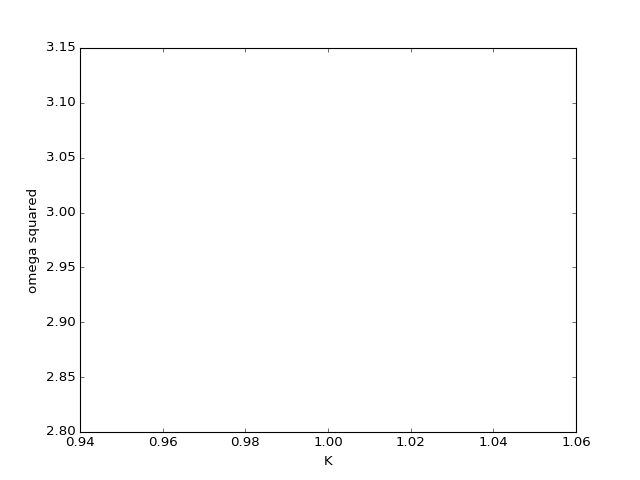

omega^2=1.498016K+1.498016


/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [3]:
omegasq = []
for time_period in time_periods:
    omegasq.append((2*np.pi/time_period)**2)
plt.plot(K_history,omegasq)
plt.ylabel('omega squared')
plt.xlabel('K')
fitted = np.polyfit(K_history,omegasq,1)
print ("omega^2=%.6fK+%.6f"%(fitted[0],fitted[1]))

In [3]:
import vpython
help(vpython)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Help on package vpython:

NAME
    vpython

PACKAGE CONTENTS
    rate_control
    vector
    vpython

FUNCTIONS
    clock(...)
        clock() -> floating point number
        
        Return the CPU time or real time since the start of the process or since
        the first call to clock().  This has as much precision as the system
        records.
    
    degrees(...)
        degrees(x)
        
        Convert angle x from radians to degrees.
    
    radians(...)
        radians(x)
        
        Convert angle x from degrees to radians.
    
    random(...) method of random.Random instance
        random() -> x in the interval [0, 1).

DATA
    GSversion = ['2.1', 'glowscript']
    INTERACT_PERIOD = 0.03333333333333333
    MAX_RENDERS = 30
    MIN_RENDERS = 10
    USER_FRACTION = 0.5
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    attach_arrows = []
    attach_trails = []
    commcmds = [{'attr': 'dummy', 'idx': -1, 'val': 0}, {'attr': 'dummy', 

In [4]:
import matplotlib
help(matplotlib)

Help on package matplotlib:

NAME
    matplotlib - This is an object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the object-oriented library is
    encouraged when programming; pyplot is primarily for working
    interactively.  The
    exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
    :func:`~matplotlib.pyplot.subplot`,
    :func:`~matplotlib.pyplot.subplots`, and
    :func:`~pyplot.savefig`, which can greatly simplify scripting.
    
    Modules include:
    
        :mod:`matplotlib.axes`
            defines the :class:`~matplotlib.axes.Axes` class.  Most pylab